In [1]:
import cv2
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
from mediapipe.python.solutions.drawing_utils import _normalized_to_pixel_coordinates

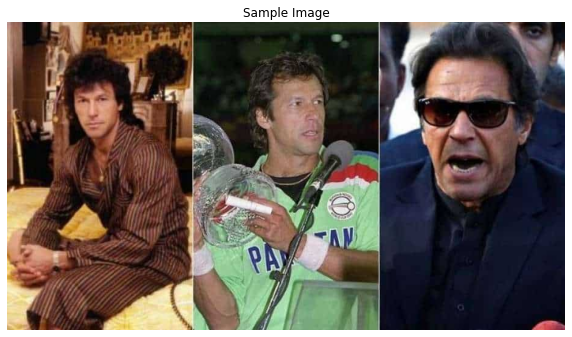

In [2]:
sample_img = cv2.imread('imran_khan_images/Im the dim__ How Pakistan PM Imran Khan.jpg')

plt.figure(figsize = [10, 10])

plt.title("Sample Image");plt.axis('off');plt.imshow(sample_img[:,:,::-1]);plt.show()

In [44]:
def face_detection(image_path,saving_dir,count):
    try:
        mp_face = mp.solutions.face_detection.FaceDetection(model_selection=1, # model selection
        min_detection_confidence=0.5 # confidence threshold
        )
        test= cv2.imread(image_path)
        image_rows, image_cols, _ = test.shape
        
        image_input = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
        
        results = mp_face.process(image_input)
        detection=results.detections
   
        for i in range(len(detection)):

            relative_bounding_box=detection[i].location_data.relative_bounding_box
        #     relative_bounding_box = location.relative_bounding_box
            rect_start_point = _normalized_to_pixel_coordinates(
            relative_bounding_box.xmin, relative_bounding_box.ymin, image_cols,
            image_rows)
            rect_end_point = _normalized_to_pixel_coordinates(
            relative_bounding_box.xmin + relative_bounding_box.width,
            relative_bounding_box.ymin + relative_bounding_box.height, image_cols,
            image_rows)
        #         color = (255, 0, 0)
        #         thickness = 2
        #         img=cv2.rectangle(image_input, rect_start_point, rect_end_point, color,)
        #         plt.title("Sample Image");plt.axis('off');plt.imshow(test);plt.show()
            try:
                xleft,ytop=rect_start_point
                xright,ybot=rect_end_point
            except TypeError:
                pass
            crop_img = image_input[ytop: ybot, xleft: xright]
            crop_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
            cv2.imwrite((saving_dir+'/img'+str(count)+str(i)+'.jpg'), crop_img)
    except:
        pass
      

In [45]:
import os

In [46]:
def images_names(path):
    entry=[str(path+'/'+entry.name) for entry in os.scandir(path)]
    return entry

In [47]:
for i,j in enumerate(images_names('imran_khan_images')):
    print(i,j)
    face_detection(j,'imran_khan_face_crop_unclean',i)

0 imran_khan_images/432 Imran Khan Politician And Cricket (1).jpg
1 imran_khan_images/432 Imran Khan Politician And Cricket.jpg
2 imran_khan_images/453 Imran Khan Politician And Cricket.jpg
3 imran_khan_images/70 Imran Khan Pti Stock Video Footage.jpg
4 imran_khan_images/AfPak File Podcast_ Imran Khan_s.jpg
5 imran_khan_images/All Of PTI Politics Premised On Propaganda_.jpg
6 imran_khan_images/All the Prime Minister_s Women.jpg
7 imran_khan_images/aloo_ tamatar__ PM Imran Khan.jpg
8 imran_khan_images/arrest ex-PM Imran Khan.jpg
9 imran_khan_images/assassination attempt on Imran Khan.jpg
10 imran_khan_images/Attack on Imran Khan marks decisive.jpg
11 imran_khan_images/Azadi march is not for politics_ its.jpg
12 imran_khan_images/Biopic on Pakistani cricketer and.jpg
13 imran_khan_images/cleanse_ Sindh bureaucracy_ police.jpg
14 imran_khan_images/Cricketer to Prime Minister of Pakistan.jpg
15 imran_khan_images/Cricketer-turned politician Imran Khan.jpg
16 imran_khan_images/cricketer-turn

141 imran_khan_images/Imran Khan_ Pakistani cricketer turned.jpg
142 imran_khan_images/Imran Khan_ Pakistani cricketer-turned.jpg
143 imran_khan_images/Imran Khan_ Pakistan_s Dream Catcher.jpg
144 imran_khan_images/Imran Khan_ Pakistan_s petulant ousted.jpg
145 imran_khan_images/Imran Khan_ Pakistan_s _anti-politician.jpg
146 imran_khan_images/Imran Khan_ playboy Pakistan cricket.jpg
147 imran_khan_images/Imran Khan_ Support for Pakistan PM.jpg
148 imran_khan_images/Imran Khan_ The cricket hero bowled out (1).jpg
149 imran_khan_images/Imran Khan_ The cricket hero bowled out.jpg
150 imran_khan_images/Imran Khan_ The Leader Whose Cricketing.jpg
151 imran_khan_images/Imran Khan_s ex-wife Jemima Goldsmith.jpg
152 imran_khan_images/Imran Khan_s fall from grace is his own.jpg
153 imran_khan_images/Imran Khan_s Instagram account was.jpeg
154 imran_khan_images/Imran Khan_s playboy cricketer status (1).jpg
155 imran_khan_images/Imran Khan_s playboy cricketer status.jpg
156 imran_khan_images/Imr

In [48]:
for i,j in enumerate(images_names('pakistan_male')):
    face_detection(j,'pakistan_male_clean',i)

In [49]:
X,y=[],[]
for j in images_names('imran_khan_cropped'):
    img=cv2.imread(j)
    j=cv2.resize(img, (64,64))
    scalled_raw_img=j.flatten()
    X.append(scalled_raw_img)
    y.append(1)


In [51]:
for j in images_names('pakistan_male_clean'):
    img=cv2.imread(j)
    j=cv2.resize(img, (64,64))
    scalled_raw_img=j.flatten()
    X.append(scalled_raw_img)
    y.append(0)


In [58]:
X=np.array(X)
y=np.array(y)
X.shape

(386, 12288)

In [59]:
y.shape

(386,)

In [60]:
np.unique(y)

array([0, 1])

In [61]:
np.save('feature',X)

In [62]:
np.save('target',y)

In [63]:
import pandas as pd 
pd.DataFrame(X).to_csv("feature.csv")